In [1]:
import sys
quic_path = '/home/quic/QUIC-Projects'
if not quic_path in sys.path:
    sys.path.append(quic_path)

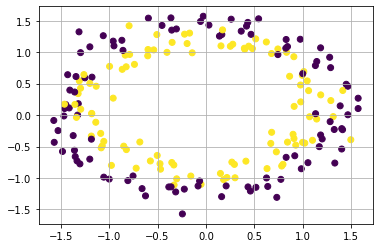

In [2]:
from sklearn.datasets import make_moons, make_circles
from custom_qiskit_v3_3.classifier import BinarySVM, Kernel
from custom_qiskit_v3_3.preprocessing import DataScaler, DataMultiScaler
from custom_qiskit_v3_3.dataset import Sklearn_DataLoader, Toy2DLinearLoader
import numpy as np 
from matplotlib import pyplot as plt

np.random.seed(10)
X, y = make_circles(200, noise=0.1)
#dl = Toy2DLinearLoader((1,1), 1)
#X, y = dl(200, noise=0.5)
#dl = Sklearn_DataLoader('iris', (1,2))
#X, y, _ , _ = dl(100, 0)
#X = X[:,:2]
dsl = []
dsl.append(DataScaler('minmax', feature_range=(-np.pi/2, np.pi/2)))
#dsl.append(DataScaler('standard', with_std=False))
#dsl.append(DataScaler('normalize', ord=None))
ds = DataMultiScaler(*dsl)
Xm = ds(X)
plt.scatter(Xm[:,0], Xm[:,1], c=y)
plt.grid()

In [3]:
np.mean(Xm, axis=0)

array([-0.04188984,  0.12294516])

In [4]:
# set hyperparams
C = None # infinite
k = 0.01 # hyperparam for reduced svm

# set svms
mutation = 'REDUCED_QASVM'
svm1 = BinarySVM(Kernel('linear'), C, mutation=mutation, k=k)
svm1_1 = BinarySVM(Kernel('Pow2'), C, mutation=mutation, k=k)
svm2 = BinarySVM(Kernel('RBF', 2), C, mutation=mutation, k=k)
svm3 = BinarySVM(Kernel('Phase'), C, mutation=mutation, k=k)
svm4 = BinarySVM(Kernel('Cosine'), C, mutation=mutation, k=k)

# fit
svm1.fit(Xm, y, centering=False)
svm1_1.fit(Xm, y, centering=False)
svm2.fit(Xm, y, centering=False)
svm3.fit(Xm, y, centering=False)
svm4.fit(Xm, y, centering=False)
print(svm1, svm1_1, svm2, svm3, svm4)

BinarySVM: (REDUCED_QASVM)
	Kernel: linear
	HyperParameter: None
	Optimization Status: optimal
	Iterations: 5
 BinarySVM: (REDUCED_QASVM)
	Kernel: Pow2
	HyperParameter: None
	Optimization Status: optimal
	Iterations: 8
 BinarySVM: (REDUCED_QASVM)
	Kernel: RBF
	HyperParameter: None
	Optimization Status: optimal
	Iterations: 13
 BinarySVM: (REDUCED_QASVM)
	Kernel: Phase
	HyperParameter: None
	Optimization Status: optimal
	Iterations: 8
 BinarySVM: (REDUCED_QASVM)
	Kernel: Cosine
	HyperParameter: None
	Optimization Status: optimal
	Iterations: 8



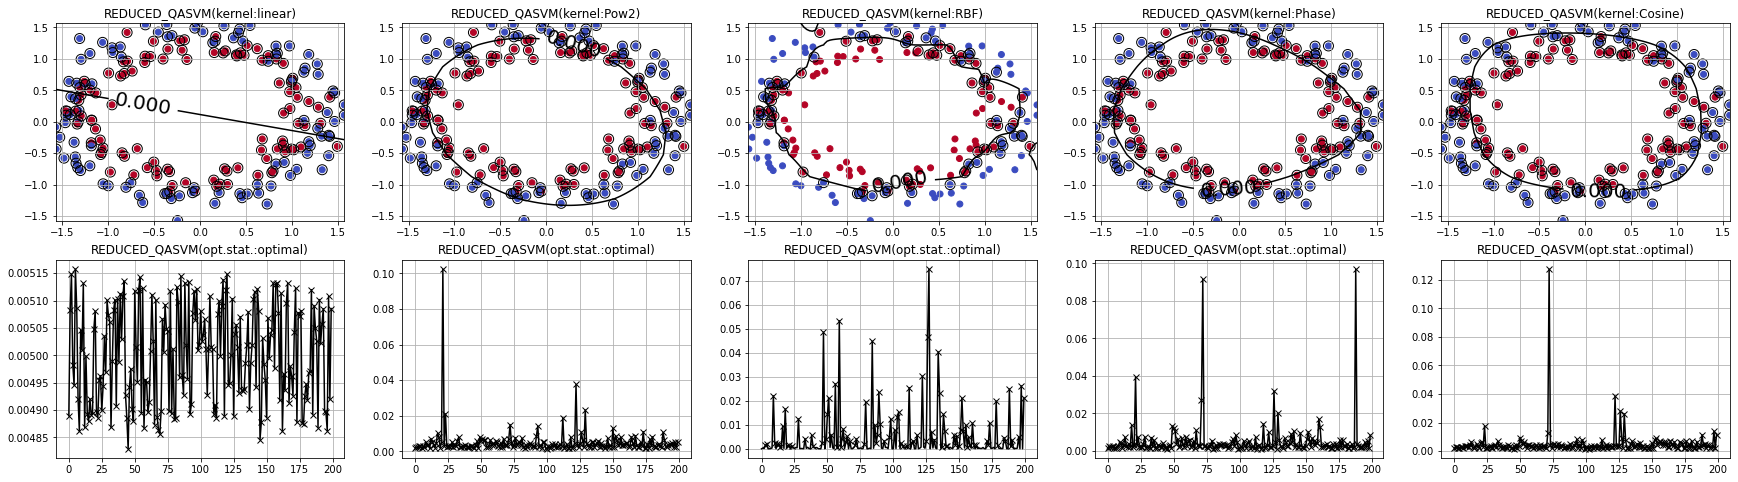

In [5]:
# visualization
fig, axes = plt.subplots(2,5, figsize=(30,8))
svms = [svm1, svm1_1, svm2, svm3, svm4]
for i in range(len(svms)):
    svms[i].plot_boundary(ax=axes[0,i])
    svms[i].plot('alpha', ax=axes[1,i])
    axes[0,i].set_title('{:}(kernel:{:})'.format(svms[i].mutation, svms[i].kernel))
    axes[1,i].set_title('{:}(opt.stat.:{:})'.format(svms[i].mutation, svms[i].status))

plt.savefig('./figs/reduced_primal_qasvm_kernels.png')